In [1]:
cd M:\IIST\SEM 2\COMPUTER VISION\Project\FaceAttributeRecognition\neutral_smile

M:\IIST\SEM 2\COMPUTER VISION\Project\FaceAttributeRecognition\neutral_smile


In [2]:
import numpy as np
import cv2
import pandas as pd
import imageio as im
from PIL import Image
import os
import dlib
from imutils.face_utils.helpers import rect_to_bb
import tqdm

In [3]:
all_images = []
labels = []
img_dir = ['smiling/','not_smiling/']
for im_dir in img_dir:
    images = os.listdir(im_dir)
    for image in images:
        img = cv2.imread(im_dir + image)
        img = cv2.resize(img, (36, 36))
        all_images.append(img)
        labels.append(img_dir.index(im_dir))

In [4]:
all_images[0].shape

(36, 36, 3)

In [5]:
data = np.array(all_images)
data = data.astype('float32')
data /= 255.0
len(data)

691

In [6]:
from sklearn.preprocessing import OneHotEncoder
labels = np.asarray(labels)
labels = labels.reshape(-1, 1)
ohe_y=OneHotEncoder()
Y=ohe_y.fit_transform(labels)
Y.shape

(691, 2)

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
x,y = shuffle(data,Y, random_state=42)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### First trained model

In [8]:
import keras
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

Using TensorFlow backend.


In [9]:
import keras
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback

classifier=Sequential()

classifier.add(Convolution2D(32,3,3,activation='relu',input_shape=(36, 36, 3)))

classifier.add(Convolution2D(64,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Convolution2D(128,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(256,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))


classifier.add(Flatten())

classifier.add(Dense(256,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(2,activation='softmax'))

classifier.compile(Adam(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])


classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=1, shuffle=True, verbose=1)

C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(36, 36, 3...)`
  if __name__ == '__main__':
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  app.launch_new_instance()
C:\Users\Bharadwaj\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`


Train on 552 samples, validate on 139 samples
Epoch 1/30
552/552 [==============================] - 7s 12ms/step - loss: 0.4107 - accuracy: 0.8623 - val_loss: 0.5205 - val_accuracy: 0.8201
Epoch 2/30
552/552 [==============================] - 6s 12ms/step - loss: 0.4289 - accuracy: 0.8641 - val_loss: 0.4832 - val_accuracy: 0.8201
Epoch 3/30
552/552 [==============================] - 7s 12ms/step - loss: 0.4114 - accuracy: 0.8641 - val_loss: 0.4690 - val_accuracy: 0.8201
Epoch 4/30
552/552 [==============================] - 7s 12ms/step - loss: 0.4078 - accuracy: 0.8641 - val_loss: 0.4789 - val_accuracy: 0.8201
Epoch 5/30
552/552 [==============================] - 6s 12ms/step - loss: 0.4083 - accuracy: 0.8641 - val_loss: 0.4712 - val_accuracy: 0.8201
Epoch 6/30
552/552 [==============================] - 6s 12ms/step - loss: 0.4145 - accuracy: 0.8641 - val_loss: 0.4698 - val_accuracy: 0.8201
Epoch 7/30
552/552 [==============================] - 6s 12ms/step - loss: 0.4061 - accuracy: 0.

In [11]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 34, 34, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)        

In [26]:
classifier.save('smile_model_1.h5')

In [11]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=1, shuffle=True, verbose=1)

Train on 552 samples, validate on 139 samples
Epoch 1/6
552/552 [==============================] - 7s 12ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.4578 - val_accuracy: 0.8777
Epoch 2/6
552/552 [==============================] - 6s 12ms/step - loss: 0.0256 - accuracy: 0.9855 - val_loss: 0.4507 - val_accuracy: 0.8417
Epoch 3/6
552/552 [==============================] - 6s 11ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.4388 - val_accuracy: 0.8921
Epoch 4/6
552/552 [==============================] - 6s 11ms/step - loss: 0.0242 - accuracy: 0.9909 - val_loss: 0.4336 - val_accuracy: 0.8921
Epoch 5/6
552/552 [==============================] - 6s 11ms/step - loss: 0.0484 - accuracy: 0.9837 - val_loss: 0.5351 - val_accuracy: 0.8849
Epoch 6/6
552/552 [==============================] - 6s 11ms/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.5025 - val_accuracy: 0.8993


### Using the LR finder

In [13]:
class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [14]:
import keras.backend as K

lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/1))
classifier.fit(X_train, y_train, callbacks=[lr_finder] )

Epoch 1/1
552/552 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9946


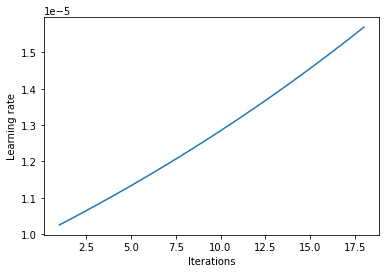

In [15]:
import matplotlib.pyplot as plt
lr_finder.plot_lr()

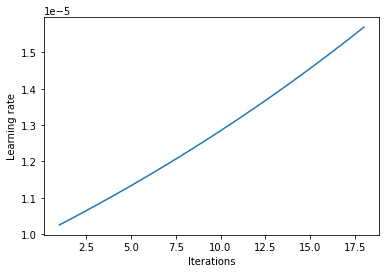

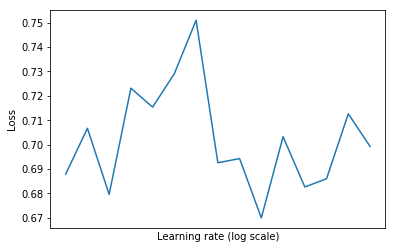

In [40]:
lr_finder.plot()

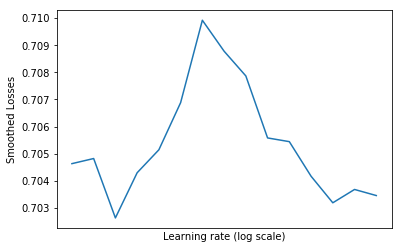

In [41]:
lr_finder.plot_smoothed_loss()


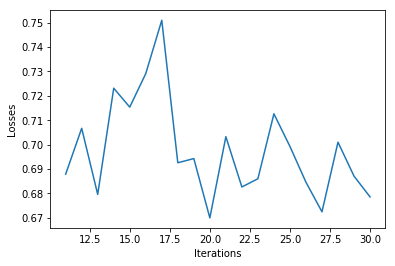

In [42]:
lr_finder.plot_loss()


### Basic Model

In [17]:
import keras
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import Callback
import keras.backend as K

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]))

model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='ADAM', metrics=['accuracy'])

In [20]:
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/1))
model.fit(X_train, y_train, callbacks=[lr_finder],epochs = 5,validation_data=(X_test,y_test),verbose=1 )

Train on 952 samples, validate on 239 samples
Epoch 1/5
952/952 [==============================] - 14s 14ms/step - loss: 0.6952 - acc: 0.5116 - val_loss: 0.6918 - val_acc: 0.5230
Epoch 2/5
952/952 [==============================] - 13s 14ms/step - loss: 0.6973 - acc: 0.5042 - val_loss: 0.6905 - val_acc: 0.5230
Epoch 3/5
952/952 [==============================] - 13s 14ms/step - loss: 0.6920 - acc: 0.5431 - val_loss: 0.6930 - val_acc: 0.4854
Epoch 4/5
952/952 [==============================] - 13s 14ms/step - loss: 0.6909 - acc: 0.5336 - val_loss: 0.6880 - val_acc: 0.5146
Epoch 5/5
952/952 [==============================] - 13s 14ms/step - loss: 0.6916 - acc: 0.5462 - val_loss: 0.6871 - val_acc: 0.6485


In [21]:
model.fit(X_train, y_train, callbacks=[lr_finder],epochs = 15,validation_data=(X_test,y_test),verbose=1 )

Train on 952 samples, validate on 239 samples
Epoch 1/15
952/952 [==============================] - 14s 14ms/step - loss: 0.6851 - acc: 0.5441 - val_loss: 0.6854 - val_acc: 0.5858
Epoch 2/15
952/952 [==============================] - 13s 14ms/step - loss: 0.6874 - acc: 0.5567 - val_loss: 0.6844 - val_acc: 0.6611
Epoch 3/15
952/952 [==============================] - 13s 14ms/step - loss: 0.6825 - acc: 0.5557 - val_loss: 0.6829 - val_acc: 0.6778
Epoch 4/15
952/952 [==============================] - 13s 14ms/step - loss: 0.6824 - acc: 0.5672 - val_loss: 0.6813 - val_acc: 0.7071
Epoch 5/15
952/952 [==============================] - 13s 14ms/step - loss: 0.6789 - acc: 0.5746 - val_loss: 0.6767 - val_acc: 0.7238
Epoch 6/15
952/952 [==============================] - 14s 14ms/step - loss: 0.6647 - acc: 0.6019 - val_loss: 0.6638 - val_acc: 0.6067
Epoch 7/15
952/952 [==============================] - 15s 16ms/step - loss: 0.6624 - acc: 0.6061 - val_loss: 0.6586 - val_acc: 0.6569
Epoch 8/15
952/9

In [41]:
# ## Selecting the images from one directory and storing in another by taking only detected faces
# detector = dlib.get_frontal_face_detector()
# dest = 'ang/'
# im_dir = 'angry/'
# i=0
# images = os.listdir(im_dir)
# for image in images:
#     if i == 300:   
#         break
#     else:
#         i+=1
#         img = cv2.imread(im_dir + image)
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         rects = detector(gray, 1) 
#         for j,rect in enumerate(rects):
#             (x, y, w, h) = rect_to_bb(rect)
#             sub_face = gray[y:y+h, x:x+w]
#             des_img = dest+str(i)+'_'+str(j)+'.png'
#             print(image,des_img)
#             cv2.imwrite(des_img,sub_face)


# ## moving images from one folder to other by chnaging image size
# source ='sup/'          
# dest = 'not_smiling/'
# images = sorted(os.listdir(source))
# k=500
# for image in images:
#     print(image)
#     img  = cv2.imread(os.path.join(source,image))
#     img = cv2.resize(img, (48, 48)) # need to resize the image into common size
#     extension = image.split('.')[-1]
#     k+=1
#     cv2.imwrite(dest+str(k)+'.'+extension,img)

# len(images)

# source ='smile/'          
# dest = 'smiling/'
# images = sorted(os.listdir(source))
# for i,image in enumerate(images):
#     print(image)
#     img  = cv2.imread(os.path.join(source,image))
#     img = cv2.resize(img, (48, 48)) # need to resize the image into common size
#     i+=1
#     cv2.imwrite(dest+str(i)+'.png',img)

# len(images)